Basic Multi-Layer Perceptron

In [13]:
# Kick off by importing libraries, and outlining the Iris dataset
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [14]:
# Let's start by naming the features
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [15]:
# Reading the dataset through a Pandas function
irisdata = pd.read_csv(url, names=names)  

The Iris ataset has five columns. 
The task is to predict the class (which are the values in the fifth column) that the iris plant belongs to.

In [30]:
irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
irisdata.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
irisdata.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

In [34]:
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

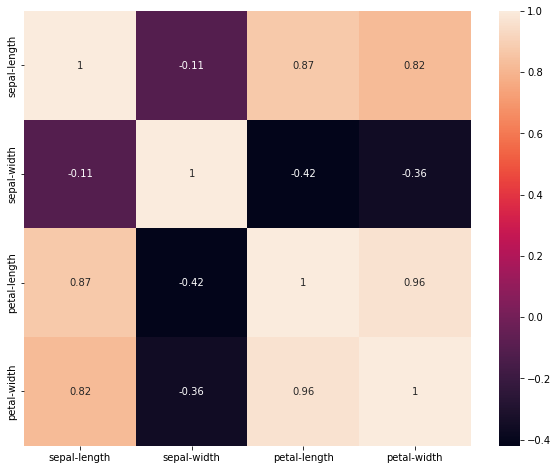

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(irisdata.corr(),annot=True)

In [16]:
# Takes first 4 columns and assign them to variable "X"
X = irisdata.iloc[:, 0:4]
# Takes first 5th columns and assign them to variable "Y". Object dtype refers to strings.
y = irisdata.select_dtypes(include=[object])  

In [17]:
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y.head()

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [19]:
# y actually contains all categories or classes:
y.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
# Now transforming categorial into numerical values
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)

In [21]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


### Scaling the variables

In [22]:
# Now for train and test split (80% of  dataset into  training set and  other 20% into test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [23]:
# Feature scaling
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [24]:
# Finally for the MLP- Multilayer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train.values.ravel())  

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [25]:
predictions = mlp.predict(X_test) 

In [35]:
predictions

array([1, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0,
       0, 0, 1, 0, 2, 2, 1, 1])

In [27]:
# Last thing: evaluation of algorithm performance in classifying flowers
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

[[12  0  0]
 [ 0  9  1]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      0.90      0.90        10
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)

0.9333333333333333

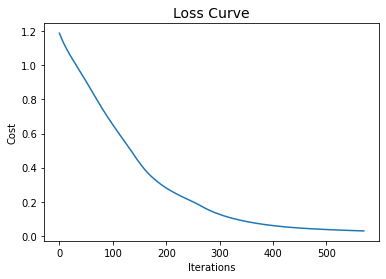

In [38]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()